# Reflectivity amplitudes

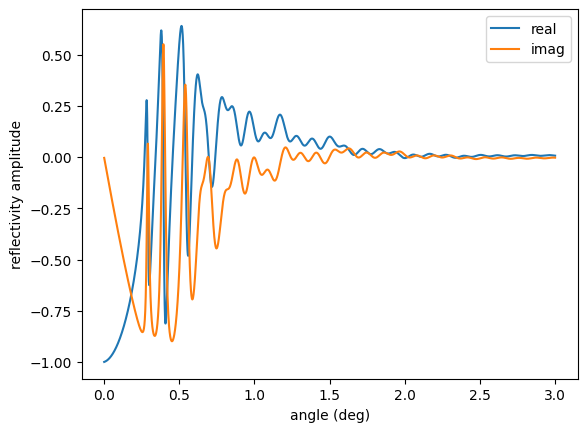

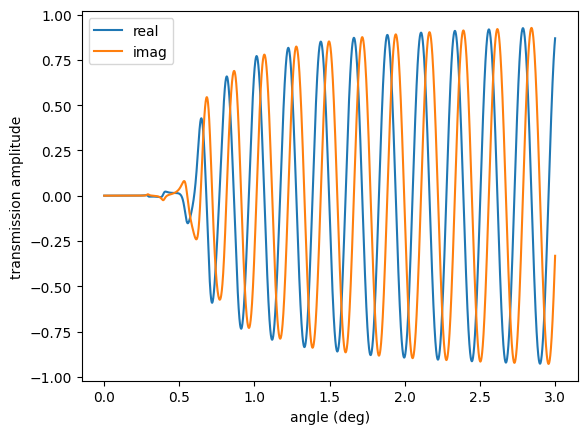

In [1]:
import nexus as nx
import numpy as np
import matplotlib.pyplot as plt

# ------------------------- Fe layer --------------------------
lay_Fe = nx.Layer(id = "Fe",
                  material = nx.Material.Template(nx.lib.material.Fe_enriched),
                  thickness = 1.5,
                  roughness = 0.35
                  )

# ----------------------------- Pt layers -----------------------------
lay_Pt_top = nx.Layer(id = "Pt top",
                material = nx.Material.Template(nx.lib.material.Pt),
                thickness = 2,
                roughness = 0.2
                )

lay_Pt = nx.Layer(id = "Pt",
                material = nx.Material.Template(nx.lib.material.Pt),
                thickness = 15,
                roughness = 0.77
                )

# -------------------------- C layer ---------------------------
lay_C = nx.Layer(id = "C",
                material = nx.Material.Template(nx.lib.material.C),
                thickness = 10,
                roughness = 0.3
                )

# --------------------- substrate ---------------------------------
lay_substrate = nx.Layer(id = "Si sub",
                material = nx.Material.Template(nx.lib.material.Si),
                thickness = nx.inf,
                roughness = 0.4
                )

# --------------------- sample ---------------------------------
# is defined in reflection here
sample = nx.Sample(id = "simple layers",
                   layers = [lay_Pt_top,
                             lay_C,
                             lay_Fe,
                             lay_C,
                             lay_Pt,
                             lay_substrate],
                    geometry = "r",
                    length = 10,
                    roughness = "a")

beam = nx.Beam(fwhm = 0.2)

exp = nx.Experiment(beam = beam,
                    objects = [sample],
                    id = "my exp")

angles = np.arange(0.001, 3, 0.001)

reflectivity_amp = nx.ReflectivityAmplitude(experiment = exp,
                                        sample = sample,
                                        energy = nx.lib.energy.CuKalpha,  # Cu K alpha line
                                        angles = angles)

ref = reflectivity_amp()

plt.plot(angles, np.real(ref), label='real')
plt.plot(angles, np.imag(ref), label='imag')
plt.legend()
plt.xlabel('angle (deg)')
plt.ylabel('reflectivity amplitude')
plt.show()

# remove the infinite substrate and set to transmission geometry
sample.layers = [lay_Pt_top,
                 lay_C,
                 lay_Fe,
                 lay_C,
                 lay_Pt]

sample.geometry = "t"

transmission_amp = nx.TransmissionAmplitude(experiment = exp,
                                            sample = sample,
                                            energy = nx.lib.energy.CuKalpha,  # Cu K alpha line
                                            angles = angles)

trans = transmission_amp()

plt.plot(angles, np.real(trans), label='real')
plt.plot(angles, np.imag(trans), label='imag')
plt.legend()
plt.xlabel('angle (deg)')
plt.ylabel('transmission amplitude')
plt.show()